In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("Retail Transactions.csv", skiprows=1)
df

,Transaction_ID,Customer_Name,Location,Product_Category,Item_Name,Price,Quantity,Returned
0,TX100000,Michael Brown,Los Angeles,Home,Lamp,176.73,3,No
1,TX100001,Laura Jones,Phoenix,Home,Table,483.51,2,No
2,TX100002,Michael Lopez,New York,Beauty,Shampoo,11.44,2,Yes
3,TX100003,Alex Miller,New York,Home,Chair,372.22,1,No
4,TX100004,Laura Jones,Chicago,Beauty,Moisturizer,108.87,1,No
...,...,...,...,...,...,...,...,...
995,TX100995,Sarah Martinez,Chicago,Beauty,Moisturizer,93.35,1,No
996,TX100996,David Martinez,Chicago,Home,Sofa,236.82,4,No
997,TX100997,Jane Williams,Houston,Clothing,Dress,138.21,1,No
998,TX100998,Michael Jones,Houston,Beauty,Perfume,119.91,4,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    1000 non-null   object 
 1   Customer_Name     1000 non-null   object 
 2   Location          1000 non-null   object 
 3   Product_Category  1000 non-null   object 
 4   Item_Name         1000 non-null   object 
 5   Price             1000 non-null   float64
 6   Quantity          1000 non-null   int64  
 7   Returned          1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [7]:
df["Price"] = pd.to_numeric(df["Price"], errors = "coerce")
df["Quantity"] = pd.to_numeric(df["Quantity"], errors = "coerce")

df["Revenue"] = df["Price"]*df["Quantity"]

df["Returned_Flag"] = df["Returned"].map({"Yes": 1,"No":0})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    1000 non-null   object 
 1   Customer_Name     1000 non-null   object 
 2   Location          1000 non-null   object 
 3   Product_Category  1000 non-null   object 
 4   Item_Name         1000 non-null   object 
 5   Price             1000 non-null   float64
 6   Quantity          1000 non-null   int64  
 7   Returned          1000 non-null   object 
 8   Revenue           1000 non-null   float64
 9   Returned_Flag     1000 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 78.3+ KB


In [10]:
df

,Transaction_ID,Customer_Name,Location,Product_Category,Item_Name,Price,Quantity,Returned,Revenue,Returned_Flag
0,TX100000,Michael Brown,Los Angeles,Home,Lamp,176.73,3,No,530.19,0
1,TX100001,Laura Jones,Phoenix,Home,Table,483.51,2,No,967.02,0
2,TX100002,Michael Lopez,New York,Beauty,Shampoo,11.44,2,Yes,22.88,1
3,TX100003,Alex Miller,New York,Home,Chair,372.22,1,No,372.22,0
4,TX100004,Laura Jones,Chicago,Beauty,Moisturizer,108.87,1,No,108.87,0
...,...,...,...,...,...,...,...,...,...,...
995,TX100995,Sarah Martinez,Chicago,Beauty,Moisturizer,93.35,1,No,93.35,0
996,TX100996,David Martinez,Chicago,Home,Sofa,236.82,4,No,947.28,0
997,TX100997,Jane Williams,Houston,Clothing,Dress,138.21,1,No,138.21,0
998,TX100998,Michael Jones,Houston,Beauty,Perfume,119.91,4,No,479.64,0


## Why?
### CEO wants to know:
Which product category makes the most money (or loses due to returns)?
- Revenue = Price × Quantity per transaction
- This is critical business insight — it’s how companies measure success.
- "Yes" / "No" labels are not numeric → can’t compute return rates.
### Now we can calculate:
- Average return rate by item
- Return % trends
- Profit loss due to returns

### Q. Which Product Category generated the highest total Revenue?

In [21]:
revenue_by_category = df[df.Returned == "No"].groupby("Product_Category")["Revenue"].sum().sort_values(ascending = False)
revenue_by_category

Product_Category
Electronics    198009.85
Home            98238.48
Clothing        69292.13
Beauty          39127.89
Name: Revenue, dtype: float64

## Why?
We only want successful sales, not returned ones.
Group by category → sum revenue → find the winner

### Q. Which Item has the highest Return Rate?

In [11]:
return_rate = (df.groupby("Item_Name")["Returned_Flag"].mean().sort_values(ascending = False))
highest_return_item = return_rate.index[0]
highest_return_rate = return_rate.iloc[0]
highest_return_item, highest_return_rate

('Jeans', 0.29411764705882354)

## Why?
Return rate = returned items ÷ total sold items
Identifies:
- Risky / faulty products
- Inventory issues
- Customer dissatisfaction

The CEO needs to stop bleeding money.

### Q. Average transaction value for customers in New York?

In [12]:
ny_df = df[df["Location"] == "New York"]
avg_ny_transaction = (ny_df["Revenue"]).mean()
avg_ny_transaction

509.4818316831684

### Q. How many **"High Value" customers** (spent over $500 in one transaction) do we have?

In [19]:
high_value_count = df[df["Revenue"] > 500]["Customer_Name"].nunique()
high_value_customers_name = df[df["Revenue"] > 500]["Customer_Name"]
print(high_value_count)
print(high_value_customers_name)

96
0       Michael Brown
1         Laura Jones
6      Laura Williams
18       David Miller
21     Sarah Martinez
            ...      
981       Chris Brown
987       Sarah Smith
989       Chris Smith
990      Alex Johnson
996    David Martinez
Name: Customer_Name, Length: 347, dtype: object


## Why?
New York is a major retail hotspot → performance check. <br>
Business questions it answers:
- Do NYC customers spend more?
- Should marketing focus on big cities?

In [23]:
summary = {
    "Top Revenue Category": revenue_by_category.index[0],
    "Highest Return Rate Item": highest_return_item,
    "NY Avg Transaction Value": round(avg_ny_transaction, 2),
    "High Value Customer Count": high_value_count
}
summary


{'Top Revenue Category': 'Electronics',
 'Highest Return Rate Item': 'Jeans',
 'NY Avg Transaction Value': 509.48,
 'High Value Customer Count': 96}

## Why?
Customers who spend big money drive profits. <br>
Companies focus loyalty programs on these people. <br>
CEO wants to know:
- Who are our VIP customers?
- Can we retain them?

# Chart 1 — Revenue by Product Category

In [24]:
import matplotlib.pyplot as plt

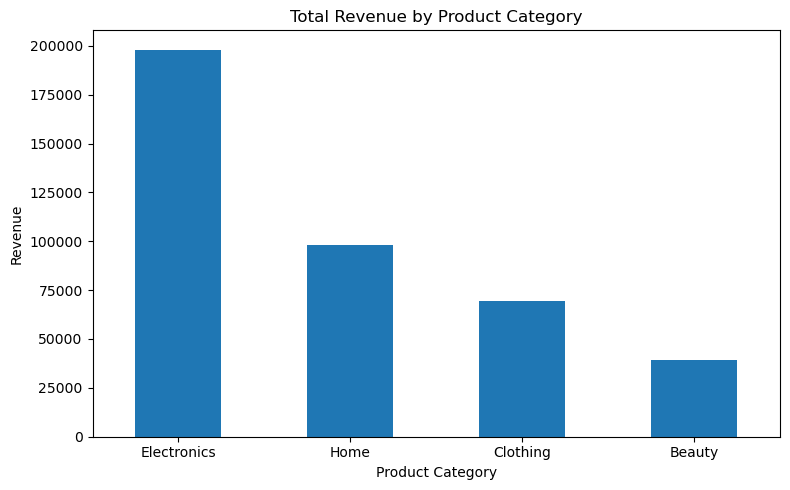

In [41]:
category_revenue = (df[df["Returned"] == "No"]
                    .groupby("Product_Category")["Revenue"]
                    .sum()
                    .sort_values(ascending = False)
                   )
plt.figure(figsize=(8, 5))
category_revenue.plot(kind = "bar")
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Revenue")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

# Chart 2 — Top 10 Items by Return Rate

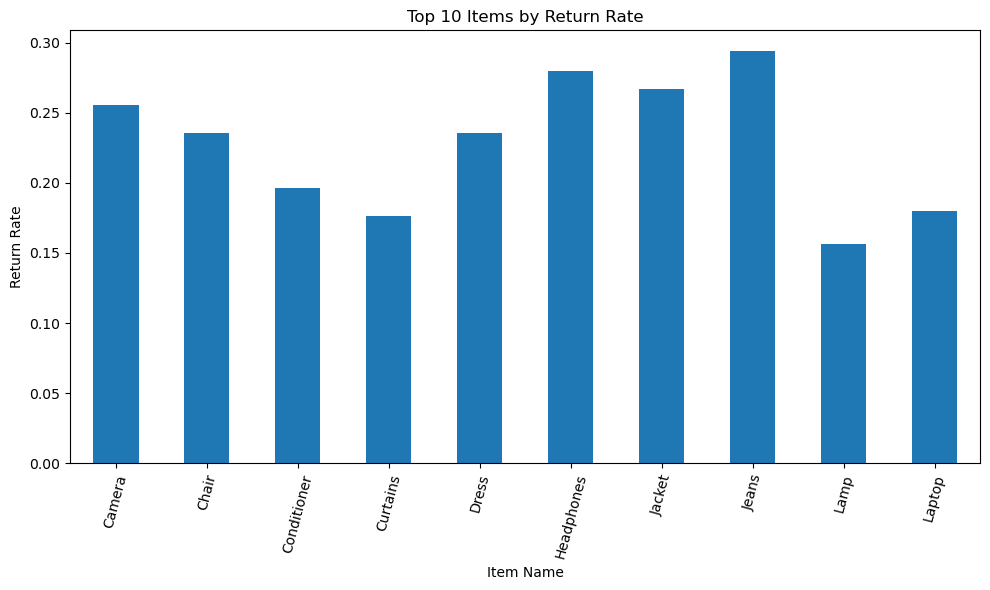

In [44]:
item_return_rate = (
    df.groupby("Item_Name")["Returned_Flag"]
    .mean()
    #.sort_values(ascending = False)
    .head(10)
)
plt.figure(figsize=(10, 6))
item_return_rate.plot(kind = "bar")
plt.title("Top 10 Items by Return Rate")
plt.xlabel("Item Name")
plt.ylabel("Return Rate")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()